In [2]:
import numpy as np
import skimage as ski
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, data
import cv2
from PIL import Image
import scipy.misc
import math
import skimage.morphology as morph
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
import bisect
from matplotlib import cm
from statistics import mean 
from scipy.interpolate import make_interp_spline
import random
import imutils
import os
from tensorflow.keras.models import load_model
import tensorflow as tf

In [81]:
infilePath = "W:\Advanced Engineering\Vortex Ballistics\Gel Images\Model Training\Original Images 2"
outFilePath = "W:\Advanced Engineering\Vortex Ballistics\Gel Images\Model Training\Black and White Original"

In [82]:
for image in os.listdir(infilePath):
    if image.find(".JPG"):
        f = os.path.join(infilePath, image)
        print(image)
        bnwImage = cv2.imread(f, 0)
        print(bnwImage)
        bnwImage = cv2.resize(bnwImage, (int(bnwImage.shape[1]/9), int(bnwImage.shape[0]/9)))
        cv2.imwrite(outFilePath + "\\" + image, bnwImage)
    else:
        continue
    

IMG_0467.JPG
[[ 7  8  8 ... 12 14 15]
 [ 8  8  7 ... 13 13 14]
 [10  8  7 ... 15 15 15]
 ...
 [ 8  7  8 ... 11 12 10]
 [ 8  7  8 ... 10 10  9]
 [ 8  8  9 ... 10 10 11]]
IMG_0468.JPG
[[2 2 2 ... 1 1 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [3 3 3 ... 3 1 1]
 [3 3 2 ... 2 3 2]
 [3 3 3 ... 1 3 2]]
IMG_0469.JPG
[[4 4 3 ... 1 1 1]
 [4 4 4 ... 2 1 2]
 [5 5 5 ... 2 1 2]
 ...
 [3 3 3 ... 3 3 3]
 [3 4 5 ... 3 3 4]
 [2 3 5 ... 1 3 4]]
IMG_0470.JPG
[[2 2 3 ... 2 3 3]
 [3 2 2 ... 2 3 2]
 [3 1 1 ... 2 2 2]
 ...
 [4 4 4 ... 4 4 3]
 [5 4 4 ... 4 5 2]
 [5 4 3 ... 4 5 2]]
IMG_0478.JPG
[[16 15 15 ... 29 29 28]
 [17 17 17 ... 29 30 30]
 [16 17 18 ... 28 29 31]
 ...
 [24 22 20 ... 33 32 31]
 [27 24 22 ... 31 31 31]
 [26 25 24 ... 28 29 30]]
IMG_0482.JPG
[[1 2 2 ... 1 2 1]
 [1 2 2 ... 2 2 2]
 [1 1 2 ... 2 2 2]
 ...
 [0 2 1 ... 2 1 1]
 [1 1 0 ... 2 1 2]
 [1 0 0 ... 1 1 2]]
IMG_0487.JPG
[[19 15 18 ... 19 18 16]
 [16 16 18 ... 19 18 18]
 [16 16 19 ... 19 18 19]
 ...
 [20 20 21 ... 25 25 25]
 [20 20 22 .

AttributeError: 'NoneType' object has no attribute 'shape'

In [3]:
#Start Here
newmodel = load_model("C:/Users/naresh\OneDrive - STERIS Corporation\Documents\models\GAN- 16x images/2940.h5")

In [4]:
i = 0

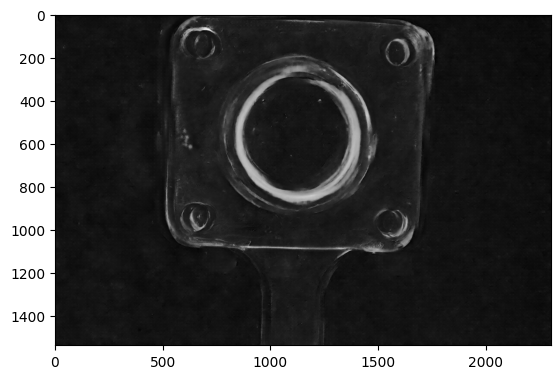

In [7]:
noise = tf.random.normal([8, 100])
generatedImage = newmodel(noise, training=False)[0, :, :, 0]
plt.imshow(generatedImage, cmap='gray')

In [74]:
i = i+1
bw_img = tf.reshape(generatedImage, (generatedImage.shape[0],generatedImage.shape[1], 1))

# Repeat channel to make 3 channels
gray_img = tf.tile(bw_img, multiples=[1, 1, 3])

# Normalize channel values  
min = tf.reduce_min(gray_img)
max = tf.reduce_max(gray_img)
gray_img = (gray_img - min) / (max - min) 

print(gray_img.shape)
# (384, 576, 3)

tf.keras.preprocessing.image.save_img('W:\Advanced Engineering\Vortex Ballistics\Gel Images\Model Training\Computer Images from Black and White Training II/IMG_' + str(i).zfill(4) +'.JPG', gray_img)

(384, 576, 3)


(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2304, 3)
(1536, 2

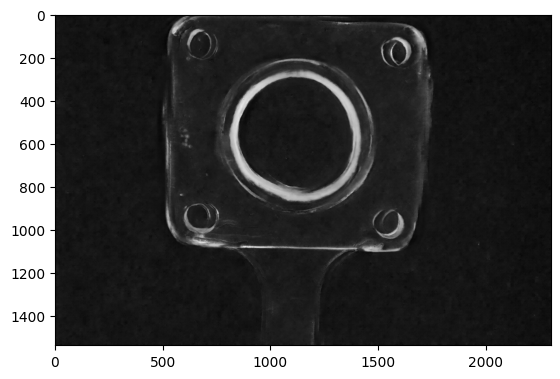

In [52]:
#Stop after running this block
for i in range(200, 300):
    noise = tf.random.normal([8, 100])
    generatedImage = newmodel(noise, training=False)[0, :, :, 0]
    plt.imshow(generatedImage, cmap='gray')

    bw_img = tf.reshape(generatedImage, (generatedImage.shape[0],generatedImage.shape[1], 1))

    # Repeat channel to make 3 channels
    gray_img = tf.tile(bw_img, multiples=[1, 1, 3])

    # Normalize channel values  
    min = tf.reduce_min(gray_img)
    max = tf.reduce_max(gray_img)
    gray_img = (gray_img - min) / (max - min) 

    print(gray_img.shape)
    # (384, 576, 3)

    tf.keras.preprocessing.image.save_img("C:/Users/naresh\OneDrive - STERIS Corporation\Documents/tmpImg\Bigger Model Img/IMG_" + str(i).zfill(4) +'.JPG', gray_img)

In [120]:
inImgPath = "W:\Advanced Engineering\Vortex Ballistics\Gel Images\Model Training\Original Images 2"
outImgPath = "W:\Advanced Engineering\Vortex Ballistics\Gel Images\Model Training/00- Full Image Dataset"

In [122]:
j = 0
for image in os.listdir(inImgPath):
    if image.find(".JPG"):
        f = os.path.join(inImgPath, image)
        bnwImage = cv2.imread(f)
        bnwImage = cv2.resize(bnwImage, (int(bnwImage.shape[1]/9), int(bnwImage.shape[0]/9)))
        cv2.imwrite(outImgPath + "/IMG_" + str(j).zfill(3) + '.JPG', bnwImage)
        j = j + 1
    else:
        continue

AttributeError: 'NoneType' object has no attribute 'shape'

In [55]:
path = "W:/Advanced Engineering/Vortex Ballistics/Gel Images/Model Training/02- test"

In [56]:
path = path + '/Watershed Out/img/'
for image in os.listdir(path):
    if image.find(".JPG") and image.count('_') < 2:
        f = os.path.join(path, image)
        print(f)
        img = cv2.imread(f)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        cv2.imwrite("W:\Advanced Engineering\Vortex Ballistics\Gel Images\Model Training/tempOrigImgWatershed/" + image, img)
    else:
        continue

W:/Advanced Engineering/Vortex Ballistics/Gel Images/Model Training/02- test/Watershed Out/img/IMG_000.jpg
W:/Advanced Engineering/Vortex Ballistics/Gel Images/Model Training/02- test/Watershed Out/img/IMG_00002.jpg
W:/Advanced Engineering/Vortex Ballistics/Gel Images/Model Training/02- test/Watershed Out/img/IMG_00004.jpg
W:/Advanced Engineering/Vortex Ballistics/Gel Images/Model Training/02- test/Watershed Out/img/IMG_00006.jpg
W:/Advanced Engineering/Vortex Ballistics/Gel Images/Model Training/02- test/Watershed Out/img/IMG_00016.jpg
W:/Advanced Engineering/Vortex Ballistics/Gel Images/Model Training/02- test/Watershed Out/img/IMG_00029.jpg
W:/Advanced Engineering/Vortex Ballistics/Gel Images/Model Training/02- test/Watershed Out/img/IMG_00030.jpg
W:/Advanced Engineering/Vortex Ballistics/Gel Images/Model Training/02- test/Watershed Out/img/IMG_00049.jpg
W:/Advanced Engineering/Vortex Ballistics/Gel Images/Model Training/02- test/Watershed Out/img/IMG_00063.jpg
W:/Advanced Engineeri

In [3]:
dir1 = "W:\Advanced Engineering\Vortex Ballistics\Gel Images\Model Training/tempOrigImgInput"
dir2 = "W:\Advanced Engineering\Vortex Ballistics\Gel Images\Model Training/tempOrigImgFixMask"
dir3 = "W:\Advanced Engineering\Vortex Ballistics\Gel Images\Model Training/tempOrigImgRingMask"
dir4 = "W:\Advanced Engineering\Vortex Ballistics\Gel Images\Model Training/tempOrigImgWatershed"
for image in os.listdir("W:\Advanced Engineering\Vortex Ballistics\Gel Images\Model Training/tempOrigImgInput"):
    f = os.path.join(dir1, image)
    img1 = cv2.imread(f)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    
    f = os.path.join(dir2, image)
    img2 = cv2.imread(f)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    f = os.path.join(dir3, image)
    img3 = cv2.imread(f)
    img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

    f = os.path.join(dir4, image)
    img4 = cv2.imread(f)
    img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
    
    if np.random.rand() < 0.8:
        cv2.imwrite("W:/Advanced Engineering/Vortex Ballistics/Gel Images/Model Training/03- train- Img only/Input/img/" + image, img1)
        cv2.imwrite("W:/Advanced Engineering/Vortex Ballistics/Gel Images/Model Training/03- train- Img only/Fixture Mask/img/" + image, img2)
        cv2.imwrite("W:/Advanced Engineering/Vortex Ballistics/Gel Images/Model Training/03- train- Img only/Ring Mask/img/" + image, img3)
        cv2.imwrite("W:/Advanced Engineering/Vortex Ballistics/Gel Images/Model Training/03- train- Img only/Watershed Out/img/" + image, img4)
    else:
        cv2.imwrite("W:/Advanced Engineering/Vortex Ballistics/Gel Images/Model Training/04- test- Img only/Input/img/" + image, img1)
        cv2.imwrite("W:/Advanced Engineering/Vortex Ballistics/Gel Images/Model Training/04- test- Img only/Fixture Mask/img/" + image, img2)
        cv2.imwrite("W:/Advanced Engineering/Vortex Ballistics/Gel Images/Model Training/04- test- Img only/Ring Mask/img/" + image, img3)
        cv2.imwrite("W:/Advanced Engineering/Vortex Ballistics/Gel Images/Model Training/04- test- Img only/Watershed Out/img/" + image, img4)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
